In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/preprocess/final_preprocessed.csv


In [2]:
path_link="/kaggle/input/preprocess/final_preprocessed.csv"
df=pd.read_csv(path_link)
df=df.sample(20000)

In [3]:
df.head()

,review_text,rating
277984,seem sensible thing people know kill whale get...,5
174384,amaze really else say harry potter book first ...,5
455836,selection book club wow wow book totally suck ...,3
15959,novel beautiful enchant read,5
322112,pretty book much happens love story felt littl...,3


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

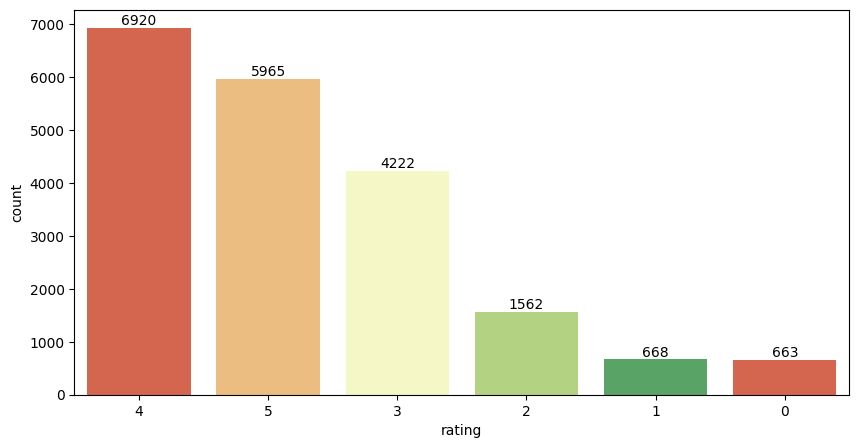

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='rating', palette=sns.color_palette("RdYlGn", 5), alpha=1, order=df['rating'].value_counts().index)
ax.bar_label(ax.containers[0])

plt.show()

above graph shows that classes are imbalanced hence to resolve this we use undersampling or oversampling

In [6]:
df['review_text'].fillna('', inplace=True)

In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df[['review_text']],df['rating'], test_size=0.2, random_state=42)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['review_text'])

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test['review_text'])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train_tfidf, y_train)

# Make predictions
predictions_logreg = logreg.predict(X_test_tfidf)

# Calculate F1 Score
f1_logreg = f1_score(y_test, predictions_logreg, average='weighted')
print("Logistic Regression F1 Score: {:.2f}".format(f1_logreg))

Logistic Regression F1 Score: 0.45


In [12]:
from sklearn.metrics import accuracy_score, classification_report

print("Classfication Report\n")
target_names = ['0','1', '2', '3', '4', '5']
classification_score = classification_report(y_test, predictions_logreg, target_names=target_names)
print(classification_score)

Classfication Report

              precision    recall  f1-score   support

           0       0.70      0.05      0.10       131
           1       0.20      0.01      0.02       125
           2       0.36      0.02      0.05       326
           3       0.41      0.31      0.36       845
           4       0.45      0.65      0.53      1366
           5       0.57      0.64      0.60      1207

    accuracy                           0.49      4000
   macro avg       0.45      0.28      0.28      4000
weighted avg       0.47      0.49      0.45      4000



above classification report shows that f1 score of classes having less count is less hence by using sampling we make count of all classes equal

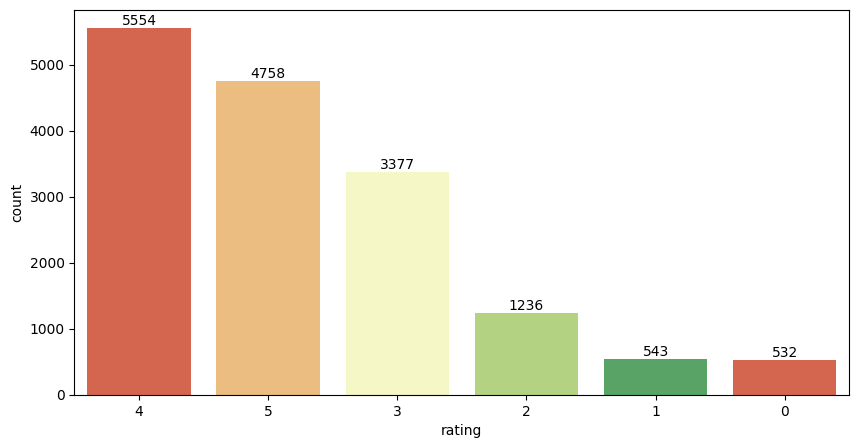

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(10, 5))
ax = sns.countplot(data=y_train,x=y_train, palette=sns.color_palette("RdYlGn", 5), alpha=1, order=y_train.value_counts().index)
ax.bar_label(ax.containers[0])

plt.show()

above graph is for training part before sampling


In [14]:
import pandas as pd


df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,review_text,rating
431709,would enjoy love second book series usually be...,3
51378,giant sigh really really really real want like...,3
79060,arc kindly provide random house child publishe...,2
626991,well normally like read good series sad juveni...,1
508077,want give away much since book release septemb...,5


In [15]:
# importing the lib
from imblearn.under_sampling import RandomUnderSampler 

# instantiating 
rus = RandomUnderSampler(random_state=42,sampling_strategy='auto')

X_train_resample,_ = rus.fit_resample(df_train, df_train['rating'])



In [16]:
X_train_resample = X_train_resample.sample(frac=1).reset_index(drop=True)


In [17]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X_train and y_train are your original training data
# Assuming X_test is your original test data

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Apply TF-IDF transformation
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_resampled['review_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['review_text'])

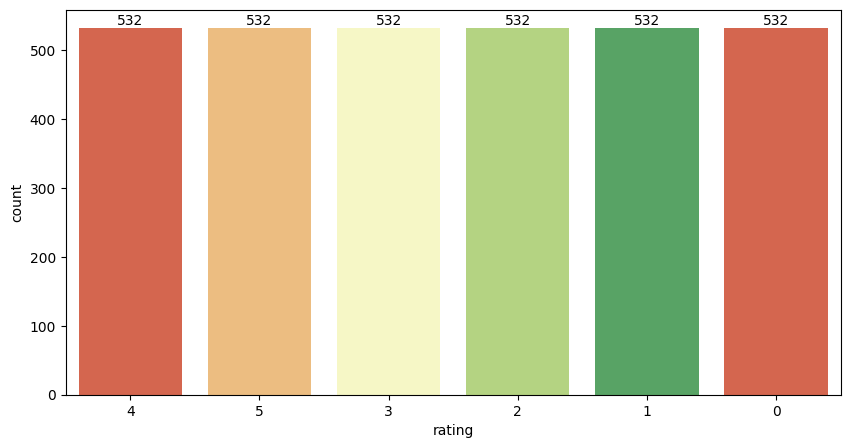

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(10, 5))
ax = sns.countplot(data=X_train_resampled,x=y_train_resampled, palette=sns.color_palette("RdYlGn", 5), alpha=1, order=y_train.value_counts().index)
ax.bar_label(ax.containers[0])

plt.show()

above graph is for training part after sampling

In [19]:
X_train_resample['review_text'].fillna('', inplace=True)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))

# Fit and transform the training data
X_train_tfidf_s = tfidf_vectorizer.fit_transform(X_train_resample['review_text'])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=2000)

# Fit the model
logreg.fit(X_train_tfidf, y_train_resampled)

LogisticRegression(max_iter=2000)

In [22]:
predictions_logreg = logreg.predict(X_test_tfidf)

# Calculate F1 Score
f1_logreg = f1_score(y_test, predictions_logreg, average='weighted')
print("Logistic Regression F1 Score: {:.2f}".format(f1_logreg))

Logistic Regression F1 Score: 0.41


In [23]:
from sklearn.metrics import accuracy_score, classification_report

print("Classfication Report\n")
target_names = ['0','1', '2', '3', '4', '5']
classification_score = classification_report(y_test, predictions_logreg, target_names=target_names)
print(classification_score)

Classfication Report

              precision    recall  f1-score   support

           0       0.16      0.45      0.24       131
           1       0.17      0.45      0.25       125
           2       0.22      0.37      0.27       326
           3       0.35      0.34      0.35       845
           4       0.51      0.27      0.35      1366
           5       0.59      0.60      0.59      1207

    accuracy                           0.40      4000
   macro avg       0.33      0.41      0.34      4000
weighted avg       0.45      0.40      0.41      4000



classwise F1 score increase but total decreased hence we decided not to use undersampling.
Because of undersampling for training less data is used hence total F1 score got decreased.

Let's try oversampling 

SMOTE generates synthetic examples to increase the number of minority class instances, creating a more balanced dataset.
class_weight modifies the loss function during training to give more importance to minority class samples. It doesn't alter the size of the training dataset.

In [27]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df[['review_text']],df['rating'], test_size=0.2, random_state=42)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['review_text'])

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test['review_text'])

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf,y_train)

# Step 4: Create a logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Step 5: Fit the model to the oversampled training data
logreg.fit(X_train_resampled, y_train_resampled)

# Step 6: Make predictions on the test set
y_pred = logreg.predict(X_test_tfidf)

f1_logreg = f1_score(y_test, y_pred, average='weighted')
print("Logistic Regression F1 Score: {:.2f}".format(f1_logreg))

Logistic Regression F1 Score: 0.49


Got good score hence applied on complete data (but got crashed because of running time exceed) hence tried directly applying on test

In [31]:
path_link="/kaggle/input/test-d/final_preprocessed_test.csv"
dft=pd.read_csv(path_link)
dft['review_text'].fillna('', inplace=True)

X_test_tfidf = tfidf_vectorizer.transform(dft['review_text'])


In [32]:
dft['rating'] = logreg.predict(X_test_tfidf)
dft.drop('review_text', axis=1, inplace=True)
path_link="/kaggle/input/test-d/test.csv"
dfc=pd.read_csv(path_link)
dft['review_id']=dfc['review_id']
desired_order = ['review_id', 'rating']

# Change the order of columns in the DataFrame
dft = dft[desired_order]
dft.to_csv('logi_smote_output_on_comp.csv', index=False)

using class_weight=balance

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['review_text'])

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test['review_text'])

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


# Initialize Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', random_state=42,max_iter=1000)

# Fit the model
logreg.fit(X_train_tfidf,y_train)
y_predicted=logreg.predict(X_test_tfidf)

f1_logreg = f1_score(y_test, y_predicted, average='weighted')
print("Logistic Regression F1 Score: {:.2f}".format(f1_logreg))

Logistic Regression F1 Score: 0.48


apllied class_weight=balanced on complete data and got accuracy=0.54191